In [31]:
suppressMessages(suppressWarnings(
{
    library(dplyr)
    library(ggplot2)
    library(stringr)
    library(xlsx)
}
))

TeleCo=read.xlsx("TelecoOutput.xlsx",1)

TeleCoLogic=TeleCo%>%select(Churn,starts_with("Logistic.Regression"))

names(TeleCoLogic)=c("Churn","LogicPredicted","LogitNo","LogitYes")

TeleCoSVM=TeleCo%>%select(Churn,starts_with("SVM"))

names(TeleCoSVM)=c("Churn","SVMPredicted","SVMNo","SVMYes")

TeleNB=TeleCo%>%select(Churn,starts_with("Naive.Bayes"))

names(TeleNB)=c("Churn","NBPredicted","NBNo","NBYes")

TeleCoLogic <- TeleCoLogic %>% mutate(LogitScore=pmax(LogitNo,LogitYes))

TeleCoSVM <- TeleCoSVM %>% mutate(SVMScore=pmax(SVMNo,SVMYes))

TeleNB <- TeleNB %>% mutate(NBScore=pmax(NBNo,NBYes))

calEva <- function(df) {
    real=df[,1]
    pred=df[,2]
    TP=sum(real=="No" & pred=="No")
    TN=sum(real=="Yes" & pred=="Yes")
    FP=sum(real=="Yes" & pred=="No")
    FN=sum(real=="No" & pred=="Yes")
    expected_value=-500*FN+(1000-500)*TN+1000*FP+0*TP
    expected_value/nrow(df)
}

In [86]:
x=1:nrow(TeleNB)

y1=y2=y3=rep(0,length(x))

for(i in x) {
    y1[i]=calEva(TeleCoLogic[1:i,])
    y2[i]=calEva(TeleCoSVM[1:i,])
    y3[i]=calEva(TeleNB[1:i,])
}

In [97]:
plot_height=options()$repr.plot.height
plot_width=options()$repr.plot.width

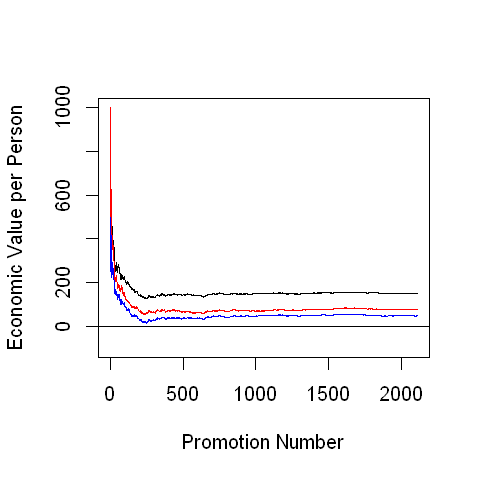

In [99]:
options(repr.plot.height=4,repr.plot.width=4)
plot(x,y1,type='l',ylim=c(-100,1000),xlab="Promotion Number",ylab="Economic Value per Person")
lines(x,y2,col='red')
lines(x,y3,col='blue')
abline(h=0)